# INF2179 Assignment 1 July 12th, 2020

Import appropriate Libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

### 1. Loading: Load the data into a data structure (e.g., pandas, or numpy array/matrix)

In [2]:
bus_data=pd.read_csv("SiriLog.csv")

In [3]:
bus_data.head()

,Time,LineID,JourneyPattern,VehicleJID,Operator,Congestion,Lon,Lat,Delay,VehicleID,StopID,AtStop
0,1411686000,65B,065B1001,7251,RD,0,-6.266066,53.338269,-739,38004,1354,0
1,1411686000,13,00131002,1809,HN,0,-6.266332,53.408386,1127,33342,323,0
2,1411686000,7,00070004,4235,D1,0,-6.130316,53.254202,-420,44016,3219,0
3,1411686000,25,025B0001,5757,CD,0,-6.446961,53.344495,143,33608,3370,0
4,1411686001,27,077A0001,2602,RD,0,-6.341833,53.289558,45,33520,2596,0


### 2. Analyzing: Which of the predictors are numeric and which are nominal (or categorical)

Categorical values take on a fixed number of possible values. Numerical variables are continuous.
* The Numeric predictors include: Time, VehicleJID, Lon, Lat, Delay.
* The Categorical predictors include: LineID, JourneyPattern,VehicleJID, Operator, Congestion, VehicleID, StopID, and AtStop.

In [4]:
bus_data.columns

Index(['Time', 'LineID', 'JourneyPattern', 'VehicleJID', 'Operator',
       'Congestion', 'Lon', 'Lat', 'Delay', 'VehicleID', 'StopID', 'AtStop'],
      dtype='object')

### 3. Exploring: What is the range of each numeric attribute? What is the mean and standard deviation of each numeric predictor?

There are 4 numeric attributes. Their ranges, means and standard deviations include:

| Categories | Range | Mean | Standard Deviation |
| --- | --- | --- | --- |
| Time |1411686000 - 1411755520|1411732540.8343|13976.2337|
| Lon | -6.6147 - -6.0531 | -6.27 | 0.0798 |
| Lat | 53.0704 - 53.6065 | 53.3431 | 0.0529 |
| Delay |-14209 - 11723 | 151.3641 | 620.025 |

Please see the code below. The functions for range, mean and standard deviation are used for question 4 as well.

In [5]:
#bus_data.describe()

In [6]:
#pd.Series(bus_data["VehicleJID"])

In [7]:
# decided to round all values to 4 decimal places

def highestpoint(dataset:pd.DataFrame, column_name:str)->float:
    '''
    Return the max value of the column specified by "column_name" 
    '''
    column=dataset[column_name]
    maxcol=column.max()
    return round(maxcol,4)

def lowestpoint(dataset:pd.DataFrame, column_name:str)->float:
    '''
    Return the max value of the column specified by "column_name" 
    '''
    column=dataset[column_name]
    mincol=column.min()
    return round(mincol,4)

def colrange(dataset:pd.DataFrame, column_name:str)-> str:
    """
    This function returns the range of a column in the form of a string
    by calling on other functions that calculate the min and max values
    and then concatentating those values in to a range format
    """
    maxcol= str(highestpoint(dataset,column_name))
    mincol= str(lowestpoint(dataset,column_name))
    return mincol + " - " + maxcol
    
def colmean(dataset:pd.DataFrame, column_name:str)-> float:
    """
    Return the mean value of the column name specified in "column_name"
    """
    column=dataset[column_name]
    meancol=column.mean()
    return round(meancol, 4)

def colstdev(dataset:pd.DataFrame, column_name:str)-> float:
    """
    Return the standard deviation of the column name specified by "column_name"
    """
    column=dataset[column_name]
    stdcol=column.std()
    return round(stdcol, 4)


In [8]:
#Calculating the max of a column
highestpoint(bus_data,"Delay")

11723

In [9]:
#Calculating the min of a column
lowestpoint(bus_data,"Delay")

-14209

In [10]:
#formatting the max and min of a column into a range
colrange(bus_data,"Delay")

'-14209 - 11723'

In [11]:
#Calculating mean of specified column
colmean(bus_data,"Delay")

151.3641

In [12]:
#Calculating standard deviation of a specified column
colstdev(bus_data,"Delay")

620.025

### 4. Manipulating: Remove rows 1000 through 8500. What is the range, mean, standard deviation of each numeric feature in the remaining dataset? Choose one of the operators. Present the mean delay for that operator.

In [13]:
newbus_data=bus_data.drop(bus_data.index[999:8500]) # row 1 is index 0, index is 1 less than the actual num
newbus_data.reset_index()

,index,Time,LineID,JourneyPattern,VehicleJID,Operator,Congestion,Lon,Lat,Delay,VehicleID,StopID,AtStop
0,0,1411686000,65B,065B1001,7251,RD,0,-6.266066,53.338269,-739,38004,1354,0
1,1,1411686000,13,00131002,1809,HN,0,-6.266332,53.408386,1127,33342,323,0
2,2,1411686000,7,00070004,4235,D1,0,-6.130316,53.254202,-420,44016,3219,0
3,3,1411686000,25,025B0001,5757,CD,0,-6.446961,53.344495,143,33608,3370,0
4,4,1411686001,27,077A0001,2602,RD,0,-6.341833,53.289558,45,33520,2596,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041069,1048570,1411755514,747,07471001,1944,SL,0,-6.244154,53.428052,213,40043,3665,1
1041070,1048571,1411755514,25,025B0001,404,PO,0,-6.451497,53.344559,-466,33371,7231,0
1041071,1048572,1411755515,39,039A0001,6323,PO,0,-6.413017,53.400772,449,33439,1874,0
1041072,1048573,1411755520,7,00081002,4142,D1,0,-6.237683,53.335594,91,44017,490,0


The new values of the measures, after removing rows 1000-8500 are:

|  Categories | Range | Mean | Standard Deviation |
| --- | --- | --- | --- |
| Time |1411686000 - 1411755520|1411732790.5605|13682.5613|
| Lon | -6.6147 - -6.0531 | -6.2699 | 0.0796 |
| Lat | 53.0704 - 53.6065 | 53.3432 | 0.0527 |
| Delay |-14209 - 11723 | 152.687 | 621.4492 |

The mean delay for the Operator "PO" is 194.4428 seconds.

In [14]:
#calculating how any unique values are present in VehicleJID, attempting to decide how to group datasets for later problems
nbu=bus_data["VehicleJID"].nunique()
nbu

5970

In [15]:
#calculating how any unique values are present in Journey Pattern, attempting to decide how to group datasets for later problems
jpu=bus_data["JourneyPattern"].nunique()
jpu

405

In [16]:
#Calling function to "calculate" range of specified column
colrange(newbus_data,"Delay")

'-14209 - 11723'

In [17]:
#delay1=newbus_data.loc[newbus_data["Delay"]==-14209]

^just wanted to check the minimum delay value, because if it is according to seconds, then that bus came really early

In [18]:
#Calling function to calculate mean of specified column
colmean(newbus_data, "Delay")

152.6865

In [19]:
#Calling function to calculate standard deviation of specified column
colstdev(newbus_data, "Delay")

621.4491

In [20]:
#variable only containing delay information from operator "OP"
oppo=newbus_data.loc[newbus_data["Operator"]=="PO"]
#oppo

In [21]:
# Mean value of the delay experienced through the operator "OP"
colmean(oppo,"Delay")

194.4428

### 5. Plotting: Plot the delay distribution per operator. You should have K histograms with K being the number of operators. What can we learn from this graph?

There are 8 histograms for 8 different operators. Based on the histograms below, we can see the frequency of delays (or early arrivals) among the different operators. For example, the long middle frequency bar for Operator "HN" covers a range whose average appears to fall on zero which can indicate that on average, vehicles under operator "HN" typically arrive on time, with a few early arrivals and delays. The narrow width of the bars for Operator "CF" could indicate presence of fewer datapoints for this operator in the dataset used. It can also indicate that "CF" offers a fairly consistent service with few delays. Overall, all operators appear to offer a similar quality of service except for "PO", which appears to have a higher range of delays.

In [22]:
bus_data["Operator"].unique()

array(['RD', 'HN', 'D1', 'CD', 'PO', 'SL', 'CF', 'D2'], dtype=object)

In [23]:
#Dataframe only containing variables desired in histrogram
operators=pd.DataFrame(newbus_data,columns=["Operator","Delay"])

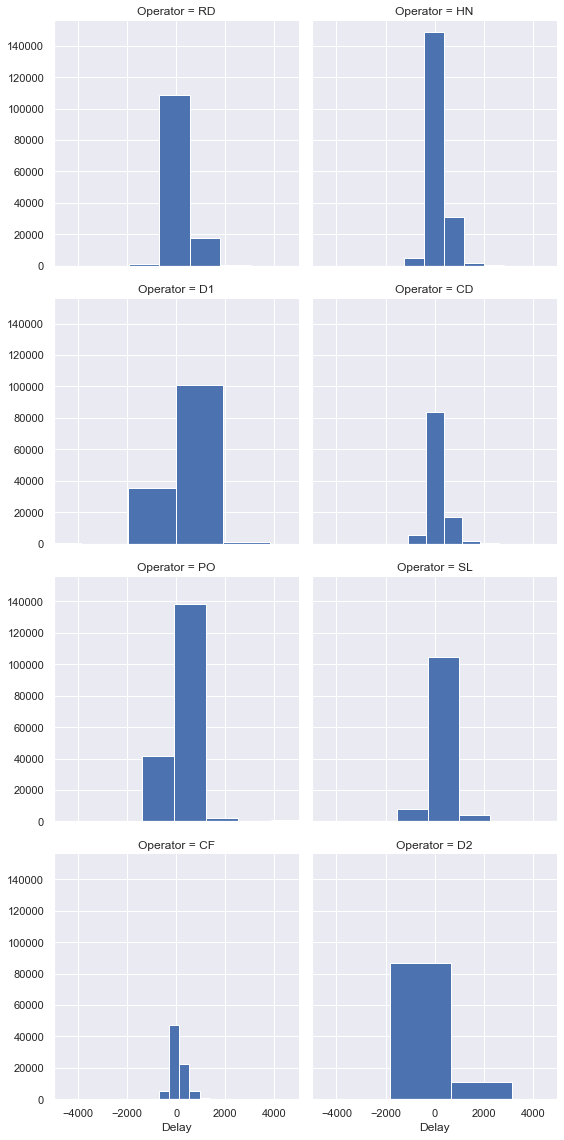

In [24]:
sb.set(style="darkgrid")
g = sb.FacetGrid(operators, col="Operator", col_wrap=2,height=4, aspect=1, xlim=(-5000, 5000))
g = g.map(plt.hist, "Delay")

### 6. Wrangling: We aim at predicting journey durations based on various trip characteristics. Create a dataset, where every row is a single journey, while the columns summarize all relevant journey information that would be useful to predict traveling times. Make sure that one of the columns is the total journey time.

Journey time is the time between the earliest and the latest event. Below is the dataset which is grouped by Vehicle Journey ID as this is a unique identifier of journeys taken by the vehicles of different operators. The new dataset named pjd, which stands for Predict Journey Duration, uses 6 of the original 12 columns, with certain columns containing new values like the average delay or congestion or total travel time per journey. 

In [25]:
bus_data.columns

Index(['Time', 'LineID', 'JourneyPattern', 'VehicleJID', 'Operator',
       'Congestion', 'Lon', 'Lat', 'Delay', 'VehicleID', 'StopID', 'AtStop'],
      dtype='object')

In [26]:
#New dataframe on focusing on variables that may potentially impact journey duration
jourdur=pd.DataFrame(bus_data,columns=["Time","JourneyPattern","LineID","VehicleJID", "Operator","Congestion","Delay","VehicleID"])
#jourdur

In [27]:
#PredictJourneyDuration
pjd=jourdur.groupby("VehicleJID").agg(JourneyPattern=pd.NamedAgg(column="JourneyPattern", aggfunc=np.unique), 
                                      AvgDelays=pd.NamedAgg(column="Delay", aggfunc=np.mean),
                                      MaxTime=pd.NamedAgg(column="Time", aggfunc="max"), 
                                      MinTime=pd.NamedAgg(column="Time", aggfunc="min"),
                                      Operator=pd.NamedAgg(column="Operator", aggfunc="first"),
                                      Route = pd.NamedAgg(column="LineID", aggfunc=np.unique),
                                      AvgCongestion=pd.NamedAgg(column="Congestion", aggfunc=np.mean),
                                      TotalCongestion=pd.NamedAgg(column="Congestion", aggfunc=np.sum))
pjd["TotalJourneyTime"]=pjd["MaxTime"]-pjd["MinTime"]
pjd
                                                                    

,JourneyPattern,AvgDelays,MaxTime,MinTime,Operator,Route,AvgCongestion,TotalCongestion,TotalJourneyTime
VehicleJID,,,,,,,,,
1,033A1002,460.085890,1411747735,1411744132,SL,33A,0.000000,0,3603
2,033A0001,1121.917722,1411751274,1411747850,SL,33A,0.000000,0,3424
4,00411001,-183.556391,1411710780,1411707605,SL,41,0.000000,0,3175
5,041C0001,-140.125874,1411714552,1411710838,SL,41,0.000000,0,3714
6,00411002,132.688172,1411719042,1411714680,SL,41,0.032258,6,4362
...,...,...,...,...,...,...,...,...,...
994331,027A0002,-80.312102,1411721355,1411717525,CF,27A,0.000000,0,3830
994987,00070001,-21.357143,1411752394,1411748261,D2,7,0.000000,0,4133
996419,039A0001,411.487179,1411720542,1411718508,PO,39,0.000000,0,2034


### 7. Correlating: Plot the traveling time as function of at least 2 journey level features (e.g.,average delay) to test correlation of those features with travel times. What are your main findings?

A few key findings from the different graphs plotted below include:
* With the exception of a few outliers, there doesn't appear to a direct positive or negative correlation between the length of a journey and the average delay experienced. In other words, there are other factors that can affect the length of a journey the number of stops on a line, or the season during which this data was collected.

* Based on the second graph, there also doesn't appear to be a correlation between the length of a journey and the average congestion experienced on route of that journey. Congestion appears to be indifferent to the amount of time it takes to complete a trip.

* The third and fourth scatterplots show that average delay and the total journey time between differet operators is relatively the same. Consumers appear to recieve consistent service from all 8 operators

<Figure size 576x576 with 0 Axes>

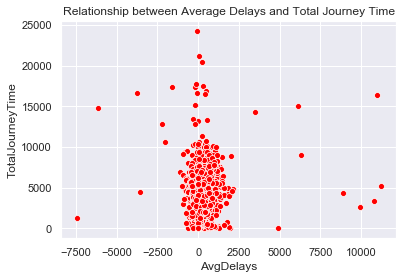

<Figure size 576x576 with 0 Axes>

In [28]:
# scatterplot showing relationship between average delays of a journey and the total time it takes to complete the journey
sb.set()
travelplot=sb.scatterplot(x="AvgDelays", y="TotalJourneyTime", color="red",data=pjd)
plt.title("Relationship between Average Delays and Total Journey Time")
plt.figure(figsize=(8,8))

<Figure size 576x576 with 0 Axes>

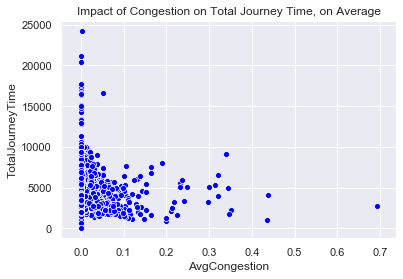

<Figure size 576x576 with 0 Axes>

In [29]:
#Scatterplot showing the relationship between the time it takes to complete a journey and congestion on the road 
sb.set()
travelplot2=sb.scatterplot(x='AvgCongestion', y='TotalJourneyTime', color="blue",data=pjd)
plt.title("Impact of Congestion on Total Journey Time, on Average")
plt.figure(figsize=(8,8))

<Figure size 576x576 with 0 Axes>

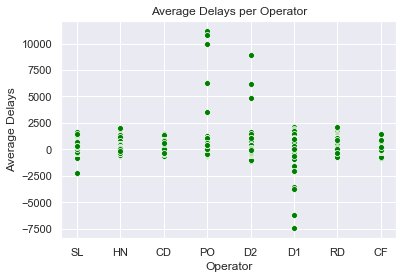

<Figure size 576x576 with 0 Axes>

In [30]:
#scatterplot showing the relationship between operators and the average delays experienced by customers
sb.set()
travelbar=sb.scatterplot(x="Operator", y="AvgDelays", color="green",data=pjd)
plt.title("Average Delays per Operator")
plt.xlabel("Operator")
plt.ylabel("Average Delays")
plt.figure(figsize=(8,8))

<Figure size 576x576 with 0 Axes>

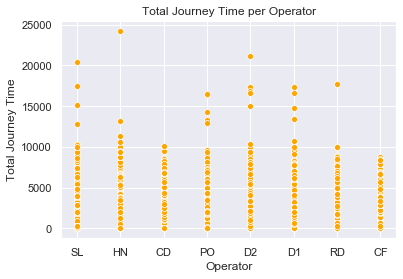

<Figure size 576x576 with 0 Axes>

In [31]:
#Scatterplot showing relationship between operators and the total time it takes to complete a journey
sb.set()
travelbar=sb.scatterplot(x="Operator", y="TotalJourneyTime",color="orange", data=pjd)
plt.title("Total Journey Time per Operator")
plt.xlabel("Operator")
plt.ylabel("Total Journey Time")
plt.figure(figsize=(8,8))